# Задача регрессии. Дерево решений



In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree

In [2]:
df=pd.read_csv('https://github.com/Vitalyastiy/courses/blob/main/stepic_ML/students.csv?raw=true', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [3]:
df_cut=df[['Year of birth', 'Month of birthday' , 'Age']]
df_cut=df_cut.dropna()

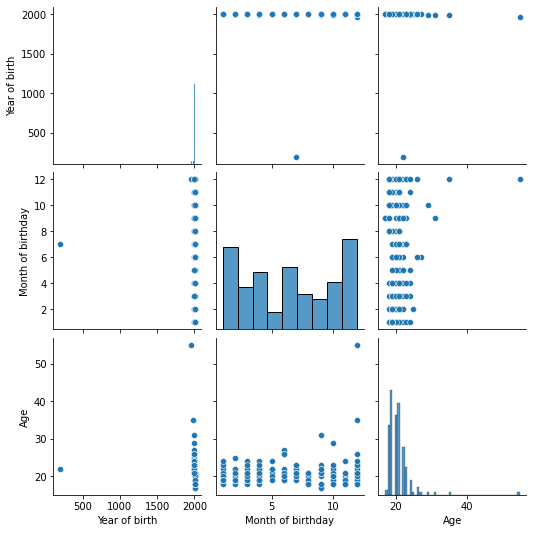

In [4]:
sns.pairplot(df_cut)

Гипотеза: угадать рост человека можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

In [6]:
model=tree.DecisionTreeRegressor(max_depth=3)
model.fit(df_cut[['Year of birth', 'Month of birthday' ]].values.reshape(-1,2), y=df_cut['Age'].values)

DecisionTreeRegressor(max_depth=3)

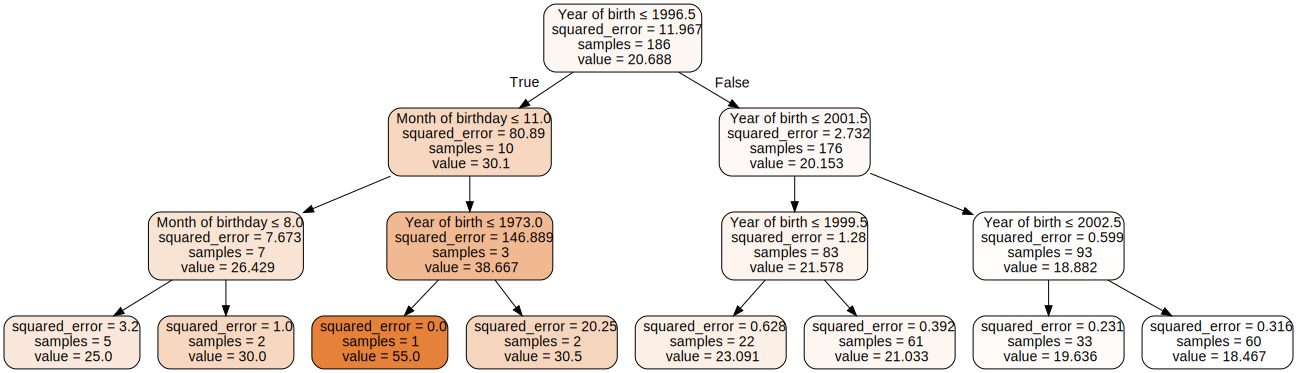

In [7]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['Year of birth', 'Month of birthday'],  
                      class_names='Age',  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Загружаем тестовую выбоку

In [14]:
df_test=pd.read_csv('https://github.com/Vitalyastiy/courses/blob/main/stepic_ML/students_test.csv?raw=true', delimiter=',')
df_test_cut=df_test[['Year of birth', 'Month of birthday', 'Age']]
df_test_cut=df_test_cut.dropna()

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [15]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Year of birth', 'Month of birthday']].values.reshape(-1,2))

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_test_cut['Age'], df_test_cut['Predicted'])

0.7241329318612689

In [20]:
df_test_cut

,Year of birth,Month of birthday,Age,Predicted
0,2000,6,22,21.032787
1,2002,3,20,19.636364
2,2001,6,21,21.032787
3,2001,7,21,21.032787
4,2000,5,22,21.032787
...,...,...,...,...
93,2002,2,20,19.636364
94,2000,4,22,21.032787
95,2000,4,22,21.032787
96,2001,9,20,21.032787


In [17]:
df_cut=df[['Age','Year of birth','Month of birthday']]


In [18]:
model=tree.DecisionTreeRegressor(max_depth=3)
model.fit(df_cut[['Year of birth','Month of birthday']].values.reshape(-1,2), y=df_cut['Age'].values)

DecisionTreeRegressor(max_depth=3)

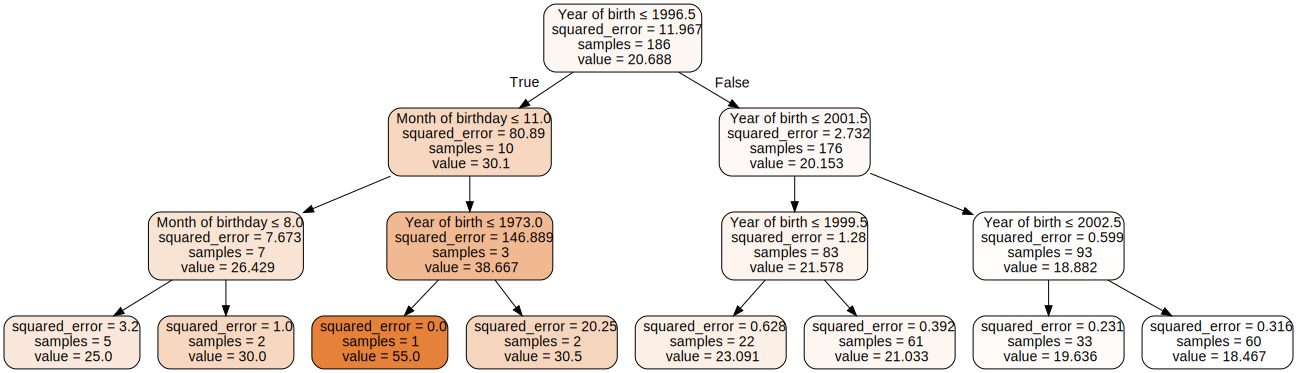

In [19]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['Year of birth','Month of birthday'],  
                      class_names='Ages',  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students_test.csv', delimiter=',')
df_test_cut=df_test[['Age','Year of birth','Month of birthday']]
df_test_cut=df_test_cut.dropna()

In [ ]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Year of birth','Month of birthday']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_test_cut['Age'], df_test_cut['Predicted'])

0.7241329318612689